In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
sns.set_style('white')
plt.style.use("dark_background")

import warnings
# Specifically ignore Deprecation Warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Ignore future warnings
warnings.filterwarnings('ignore', category=FutureWarning)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\spending_patterns_detailed.csv')
data.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
data.shape

(10000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       10000 non-null  object 
 1   Category          10000 non-null  object 
 2   Item              10000 non-null  object 
 3   Quantity          10000 non-null  int64  
 4   Price Per Unit    10000 non-null  float64
 5   Total Spent       10000 non-null  float64
 6   Payment Method    10000 non-null  object 
 7   Location          10000 non-null  object 
 8   Transaction Date  10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [5]:
data.isna().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [6]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Month'] = data['Transaction Date'].dt.month_name()
data['Year'] = data['Transaction Date'].dt.year
data['Days'] = data['Transaction Date'].dt.day_name()

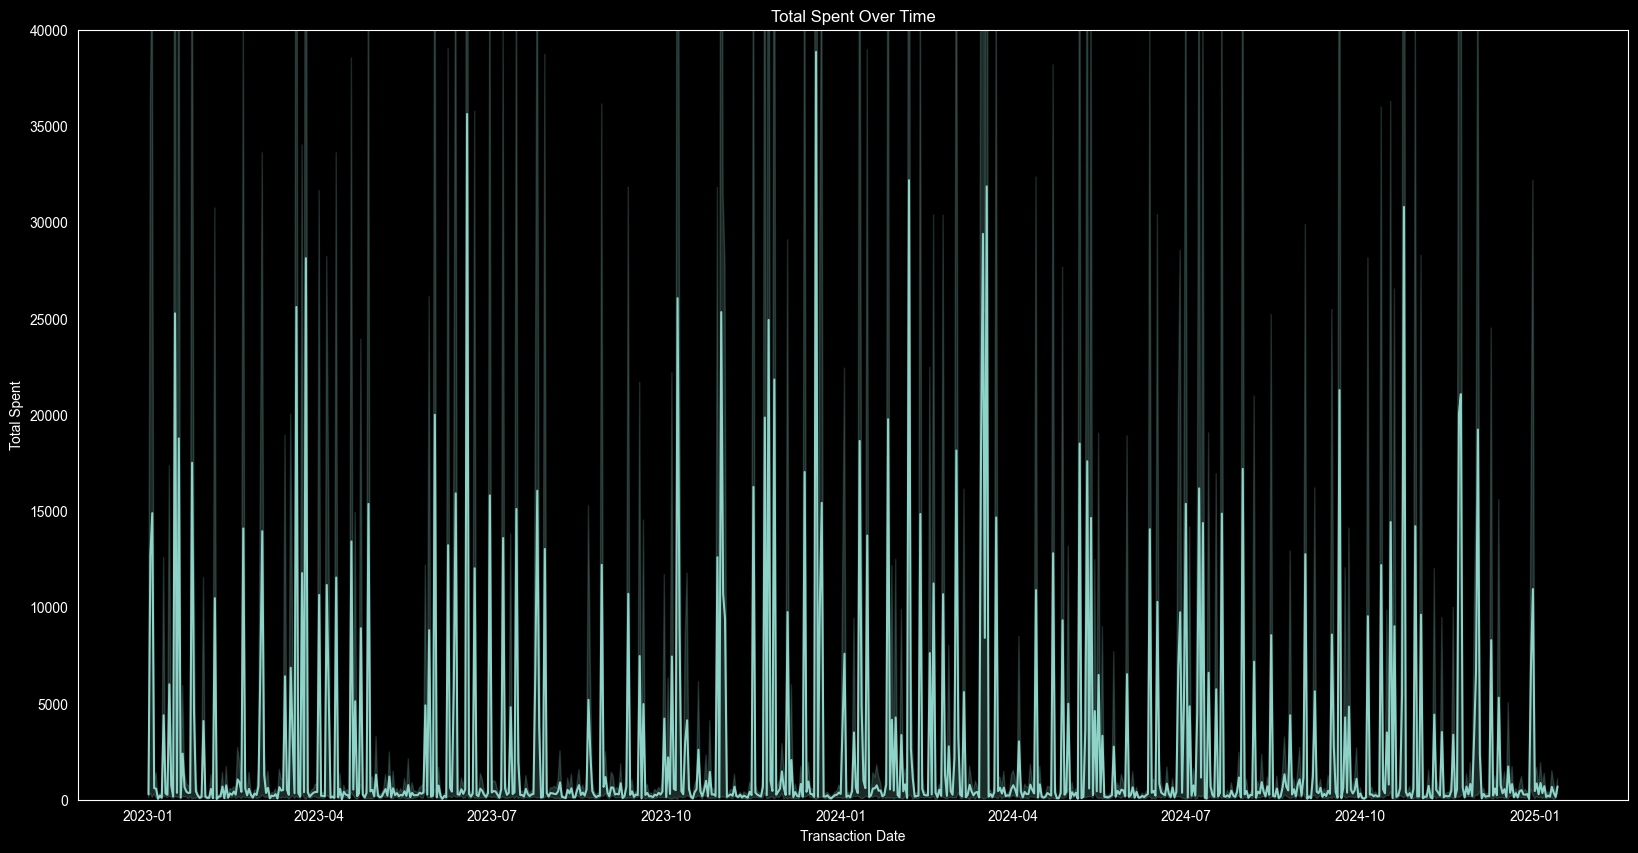

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(data=data,x='Transaction Date',y='Total Spent')#,hue='Location')
ax.set_title('Total Spent Over Time')
ax.set_ylim(0,40000)
plt.show()

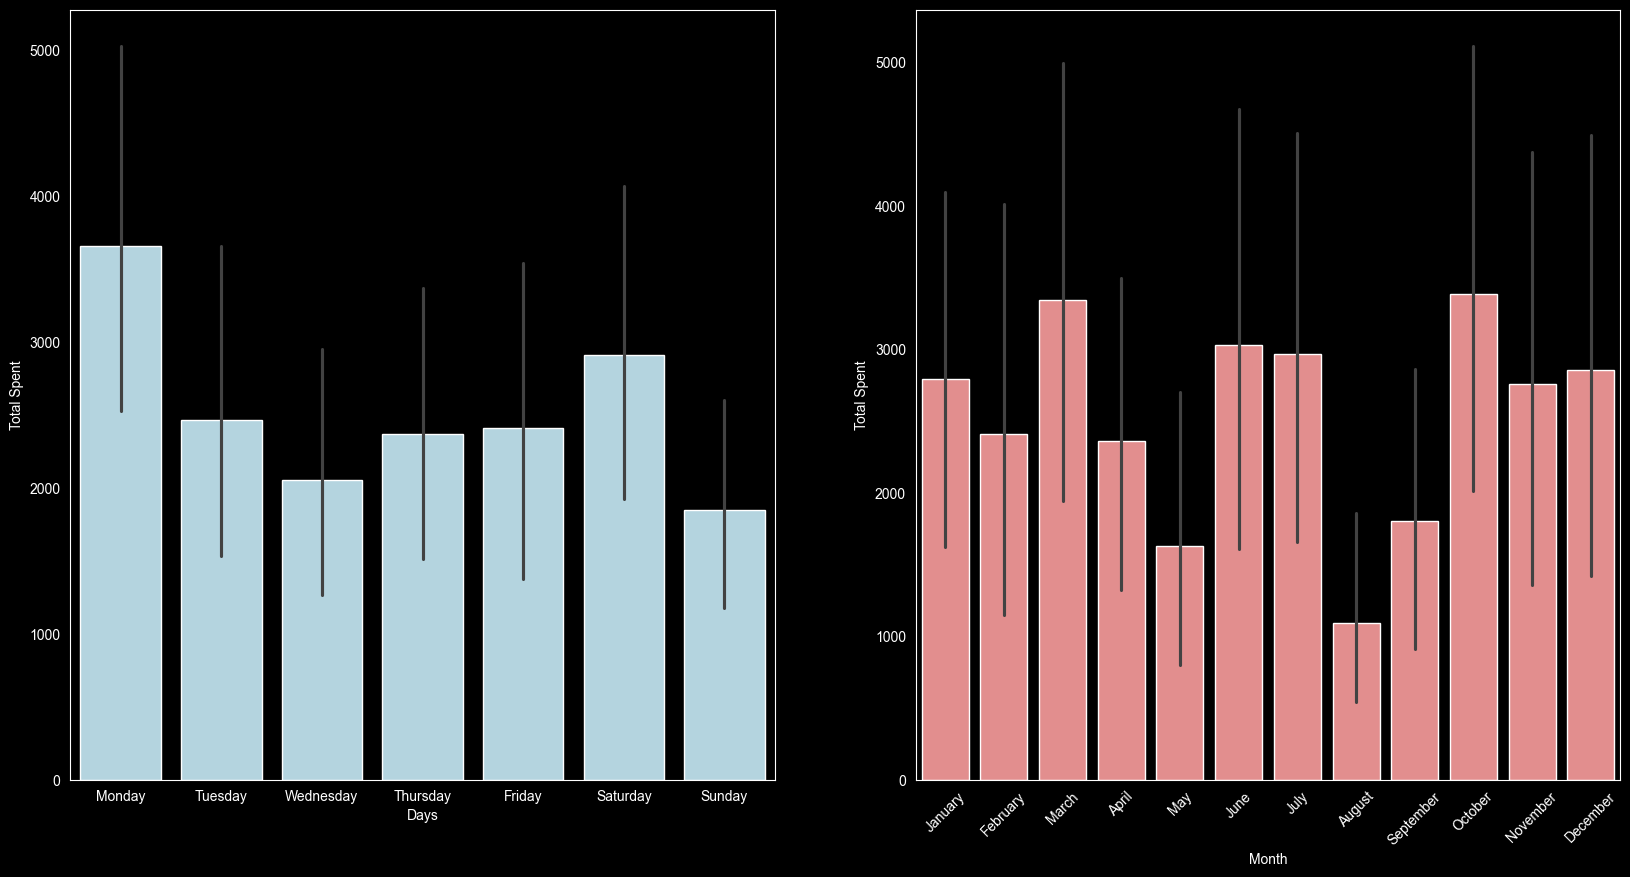

In [8]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
data['Month'] = pd.Categorical(data['Month'],categories=month_order,ordered=True)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data['Days'] = pd.Categorical(data['Days'],categories=day_order,ordered=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
sns.barplot(x=data['Days'],y=data['Total Spent'],ax=axes[0],color='lightblue')
sns.barplot(x=data['Month'],y=data['Total Spent'],ax=axes[1],color='lightcoral')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

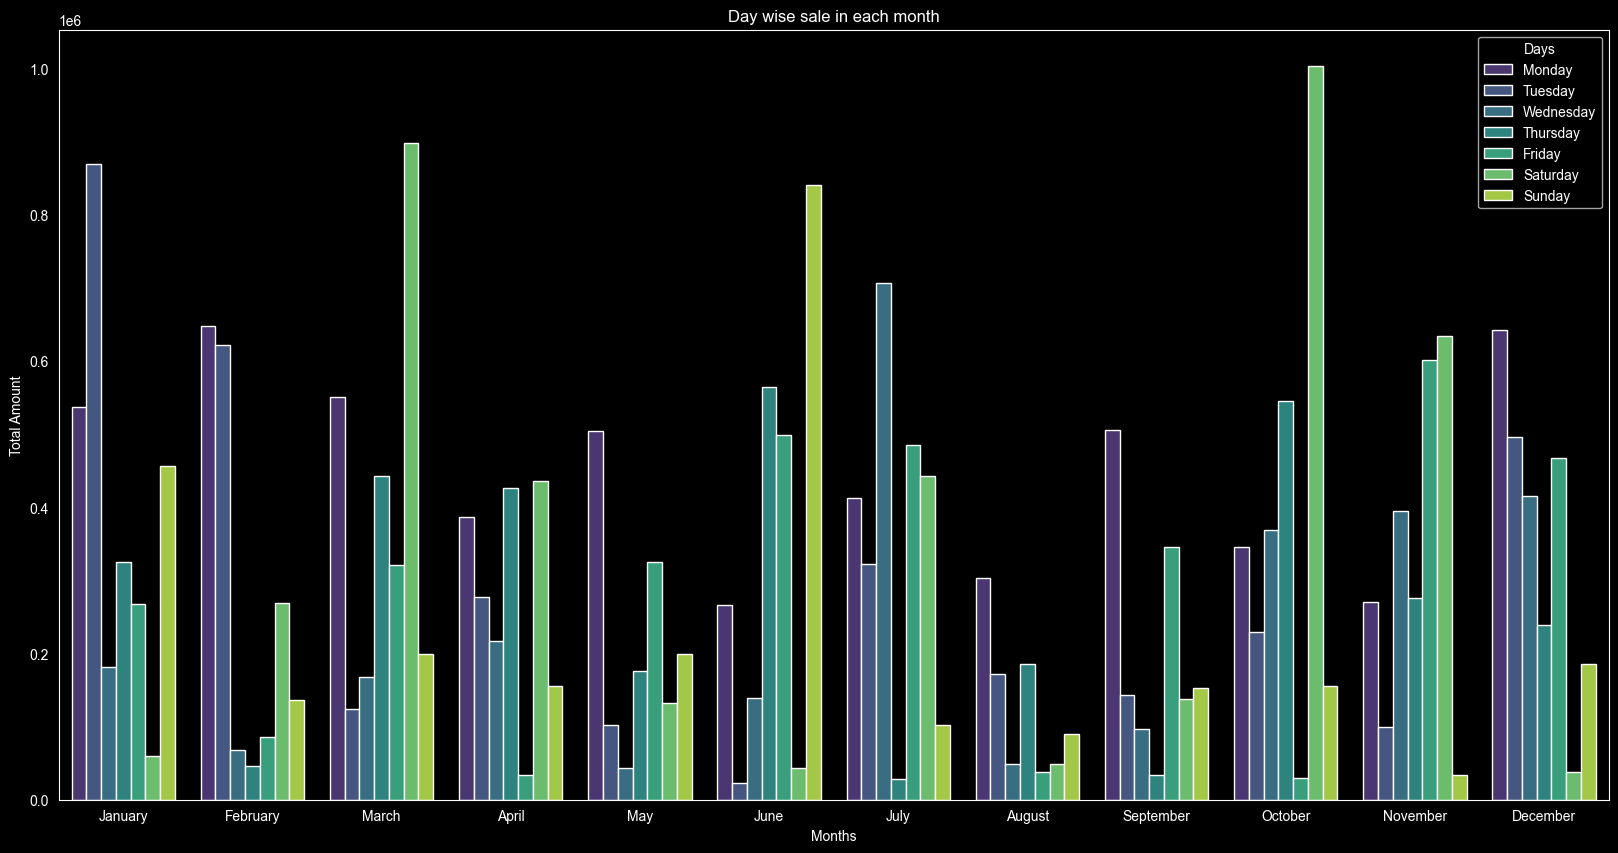

In [9]:
group1 = data.groupby(['Month','Days'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent',ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=group1, x='Month',y='Total Spent',hue='Days',palette='viridis')
plt.title('Day wise sale in each month')
plt.ylabel('Total Amount')
plt.xlabel('Months')
plt.legend(title='Days', loc='upper right')
plt.show()

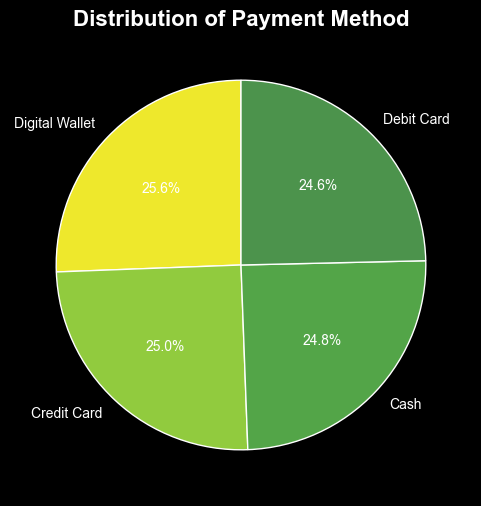

In [10]:
color=['#eee82c', '#91cb3e', '#53a548', '#4c934c', '#19381f']
data['Payment Method'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(6, 6), 
    colors=color)
plt.title('Distribution of Payment Method', fontsize=16,weight='bold')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

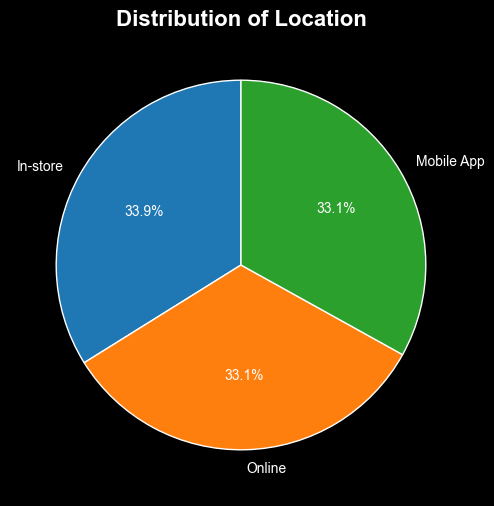

In [11]:
color=['#1f77b4', '#ff7f0e', '#2ca02c']
data['Location'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(6, 6), 
    colors=color)
plt.title('Distribution of Location', fontsize=16,weight='bold')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

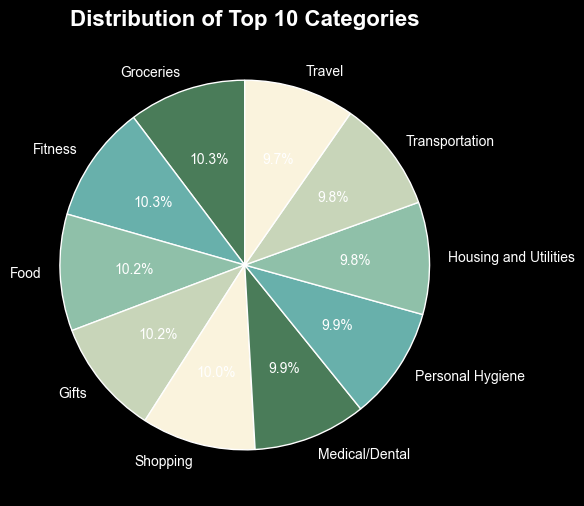

In [12]:
color=['#4a7c59', '#68b0ab', '#8fc0a9', '#c8d5b9', '#faf3dd']
data['Category'].value_counts().head(10).plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(6,6), 
    colors=color)
plt.title('Distribution of Top 10 Categories', fontsize=16,weight='bold')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

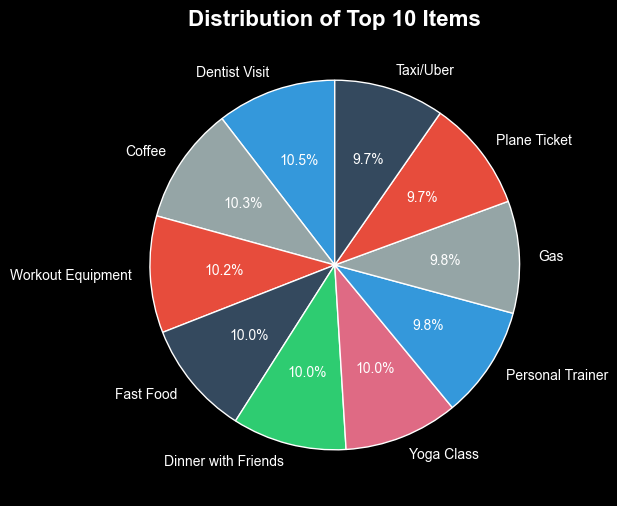

In [13]:
color=["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#df6a84"]
data['Item'].value_counts().head(10).plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    figsize=(6,6), 
    colors=color)
plt.title('Distribution of Top 10 Items', fontsize=16,weight='bold')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

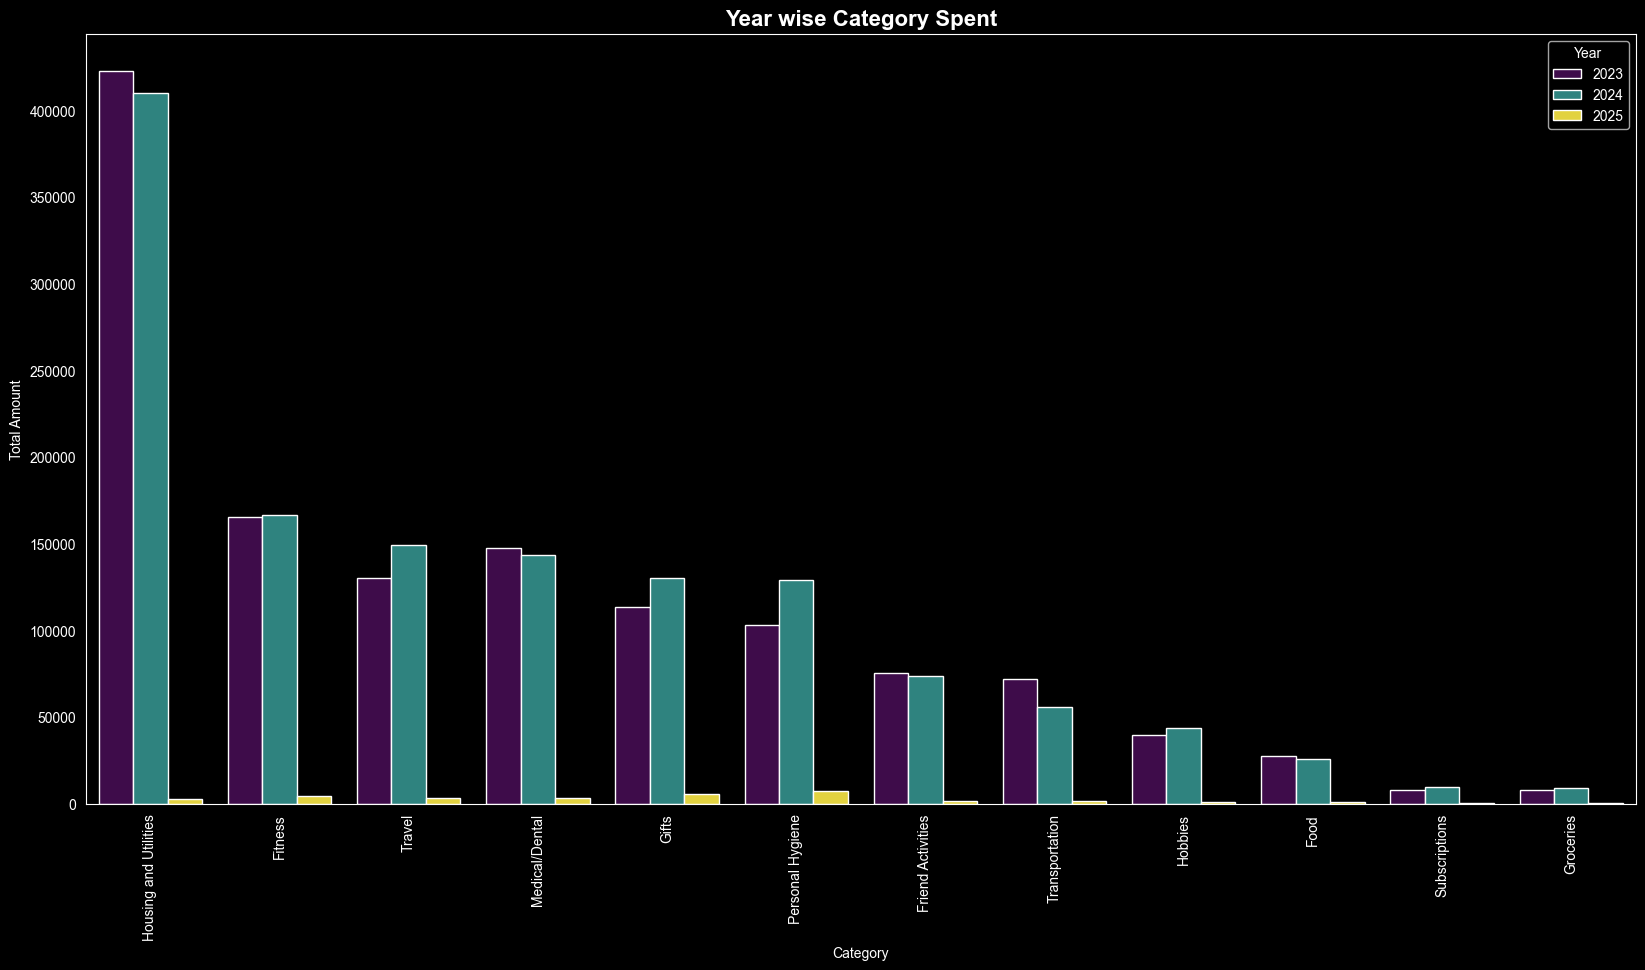

In [14]:
group2 = data[data['Category']!='Shopping'].groupby(['Category','Year'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(data=group2, x='Category',y='Total Spent',hue='Year',palette='viridis')
plt.title('Year wise Category Spent', fontsize=16,weight='bold')
plt.ylabel('Total Amount')
plt.xlabel('Category')
plt.legend(title='Year', loc='upper right')
plt.xticks(rotation=90)
plt.show()

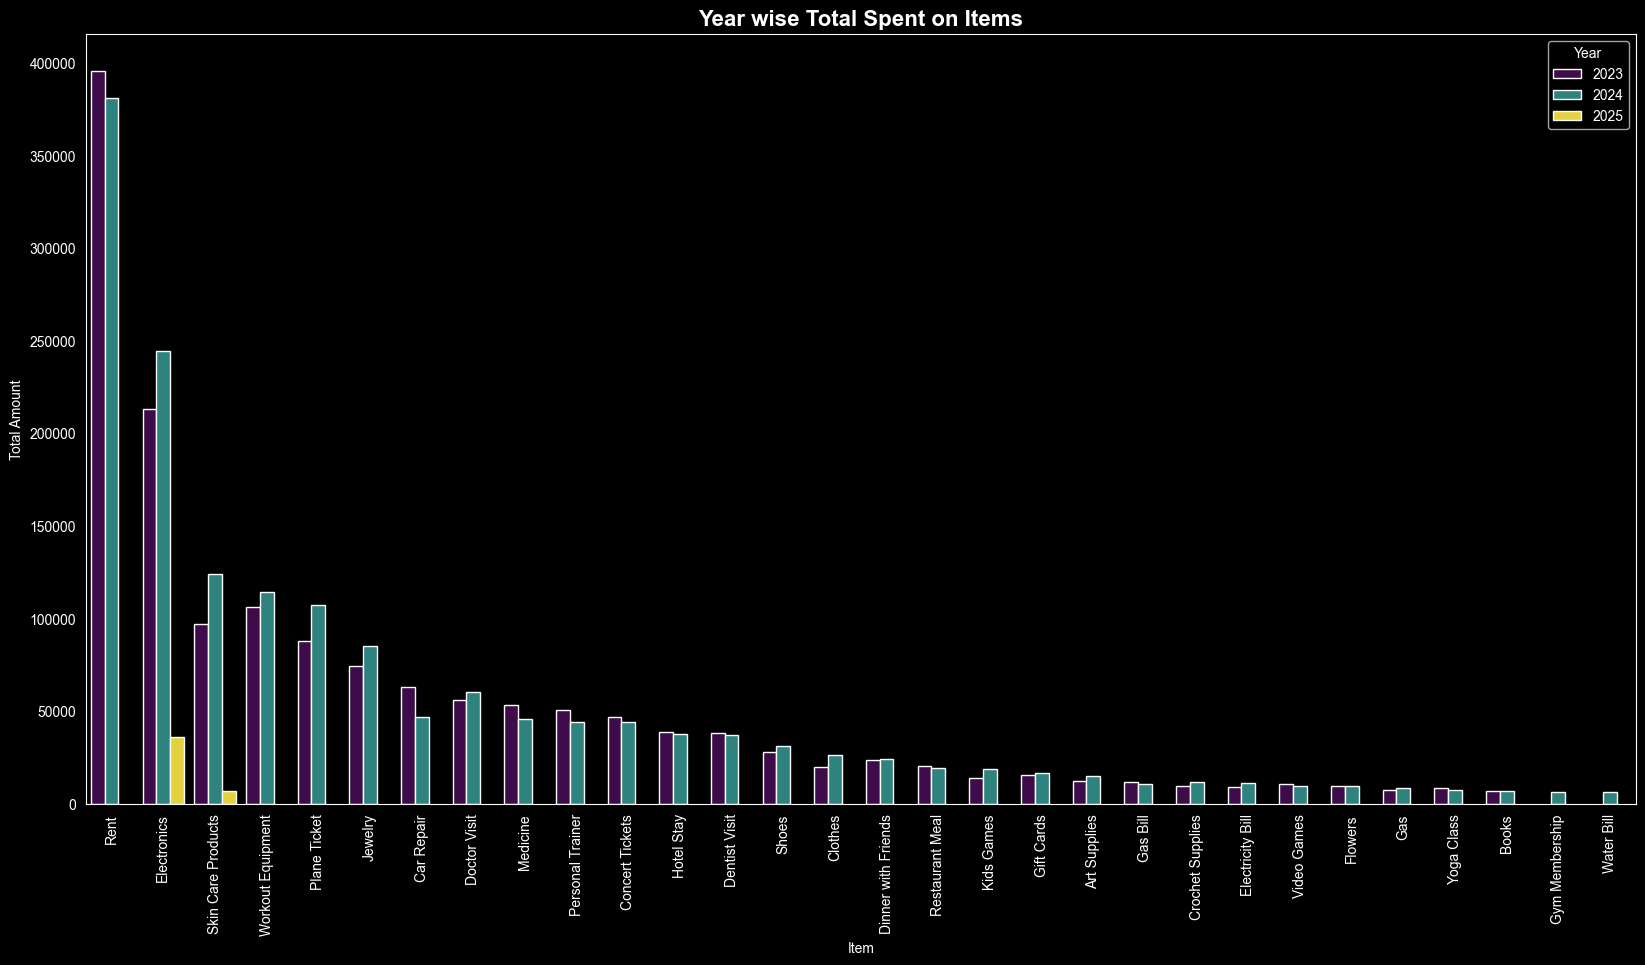

In [15]:
group3 = data[data['Item']!='Car'].groupby(['Item','Year'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent',ascending=False).head(60)
plt.figure(figsize=(20,10))
sns.barplot(data=group3, x='Item',y='Total Spent',hue='Year',palette='viridis')
plt.title('Year wise Total Spent on Items', fontsize=16,weight='bold')
plt.ylabel('Total Amount')
plt.xlabel('Item')
plt.legend(title='Year', loc='upper right')
plt.xticks(rotation=90)
plt.show()

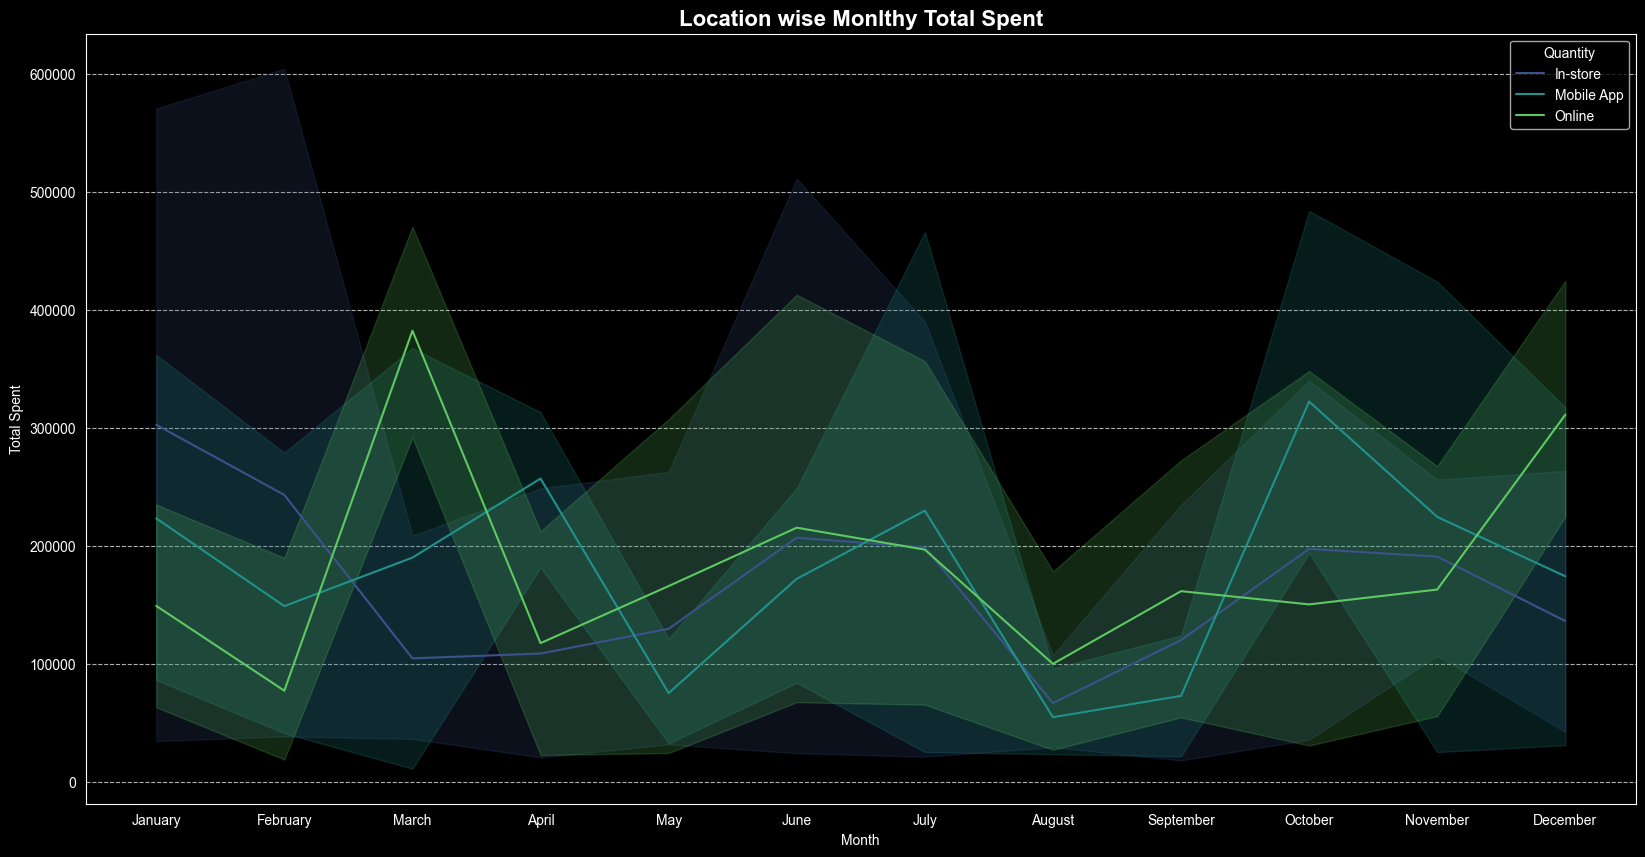

In [16]:
group4 = data.groupby(['Month','Payment Method','Location'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent',ascending=False)
color=["#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#df6a84"]
plt.figure(figsize=(20,10))
sns.lineplot(data=group4, y='Total Spent',x='Month',hue='Location',palette='viridis')
plt.title('Location wise Monlthy Total Spent', fontsize=16,weight='bold')
plt.legend(title='Quantity', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

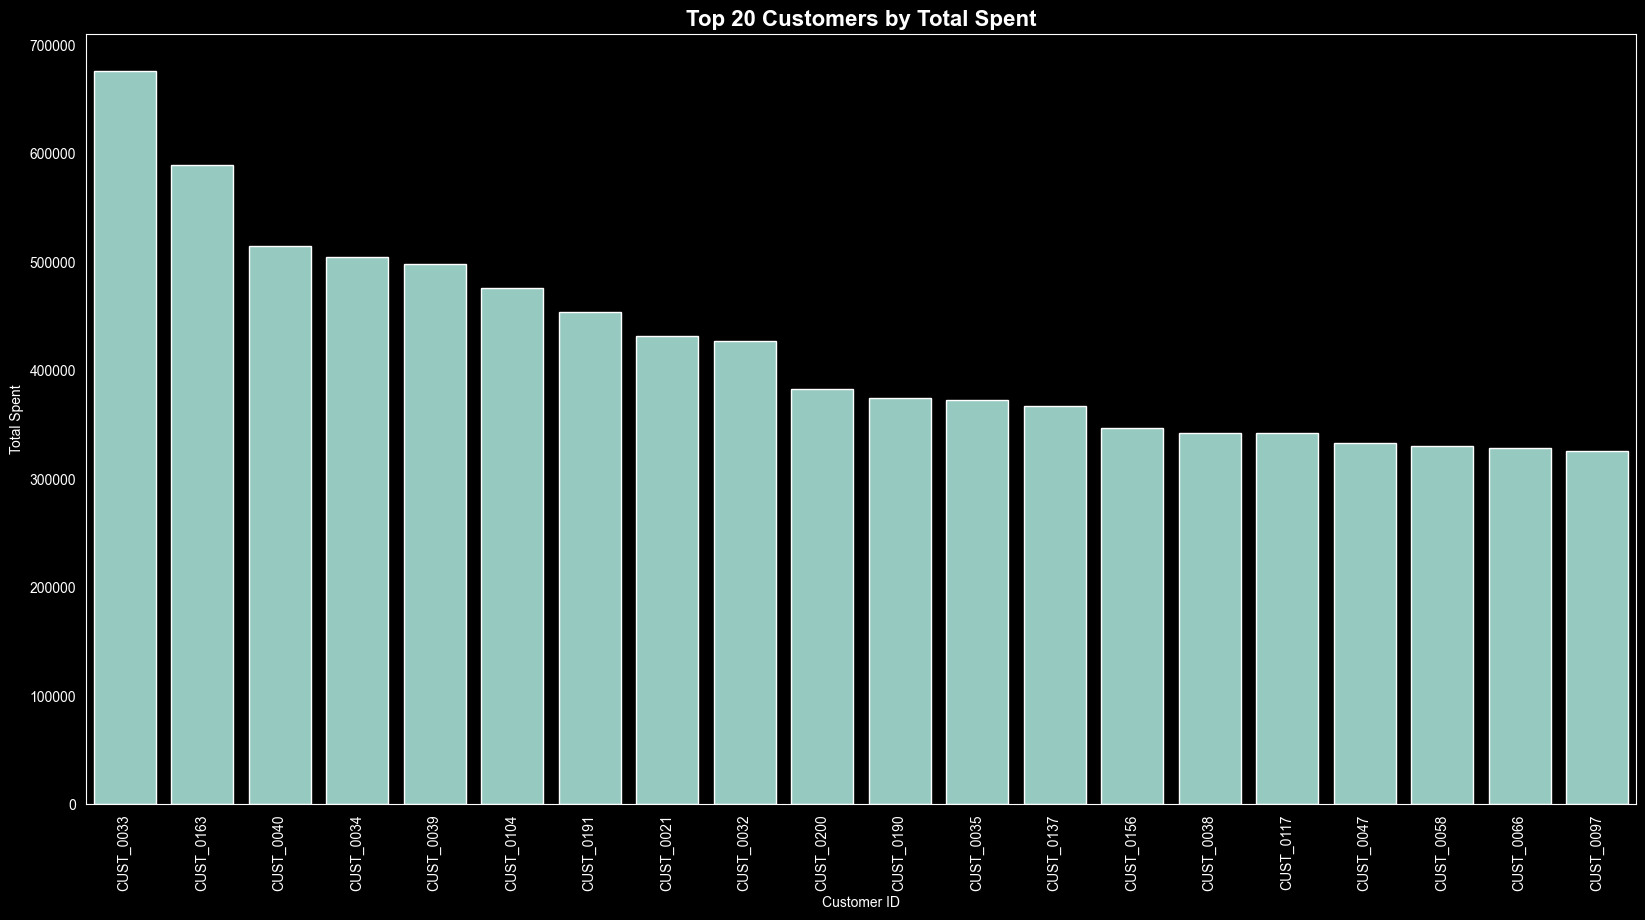

In [17]:
top_20cust=data.groupby(['Customer ID'])['Total Spent'].sum().reset_index().sort_values(by='Total Spent',ascending=False).head(20)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=top_20cust,x='Customer ID',y='Total Spent')
plt.title('Top 20 Customers by Total Spent', fontsize=16,weight='bold')
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x1000 with 0 Axes>

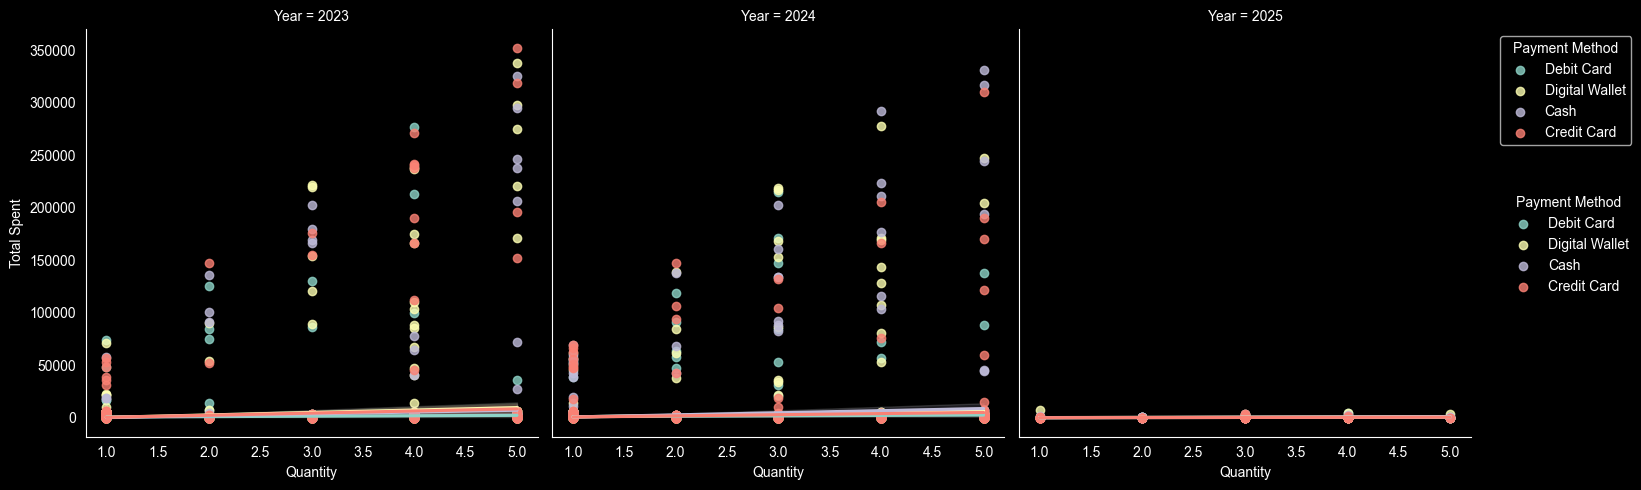

In [18]:
plt.figure(figsize=(20,10))
sns.lmplot(data=data,x='Quantity',y='Total Spent',hue='Payment Method',col='Year')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
def dummies(df,cols):
    for col in cols:
        dummies = pd.get_dummies(df[col],dtype=int,prefix=col)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(labels=col, axis=1)
    return df

nominal = ['Payment Method','Location','Quantity','Year']
data = dummies(data,nominal)

In [20]:
def stackbar(data):
    categories = data.index
    values = data.values
    columns=data.columns
    
    fig, ax = plt.subplots(figsize=(20,10))
    cum_sum=np.zeros(len(categories))

    for i,columns in enumerate(columns):
        plot = ax.bar(categories, values[:,i],bottom=cum_sum,label=columns)
        cum_sum+=values[:,i]
    return (plot)

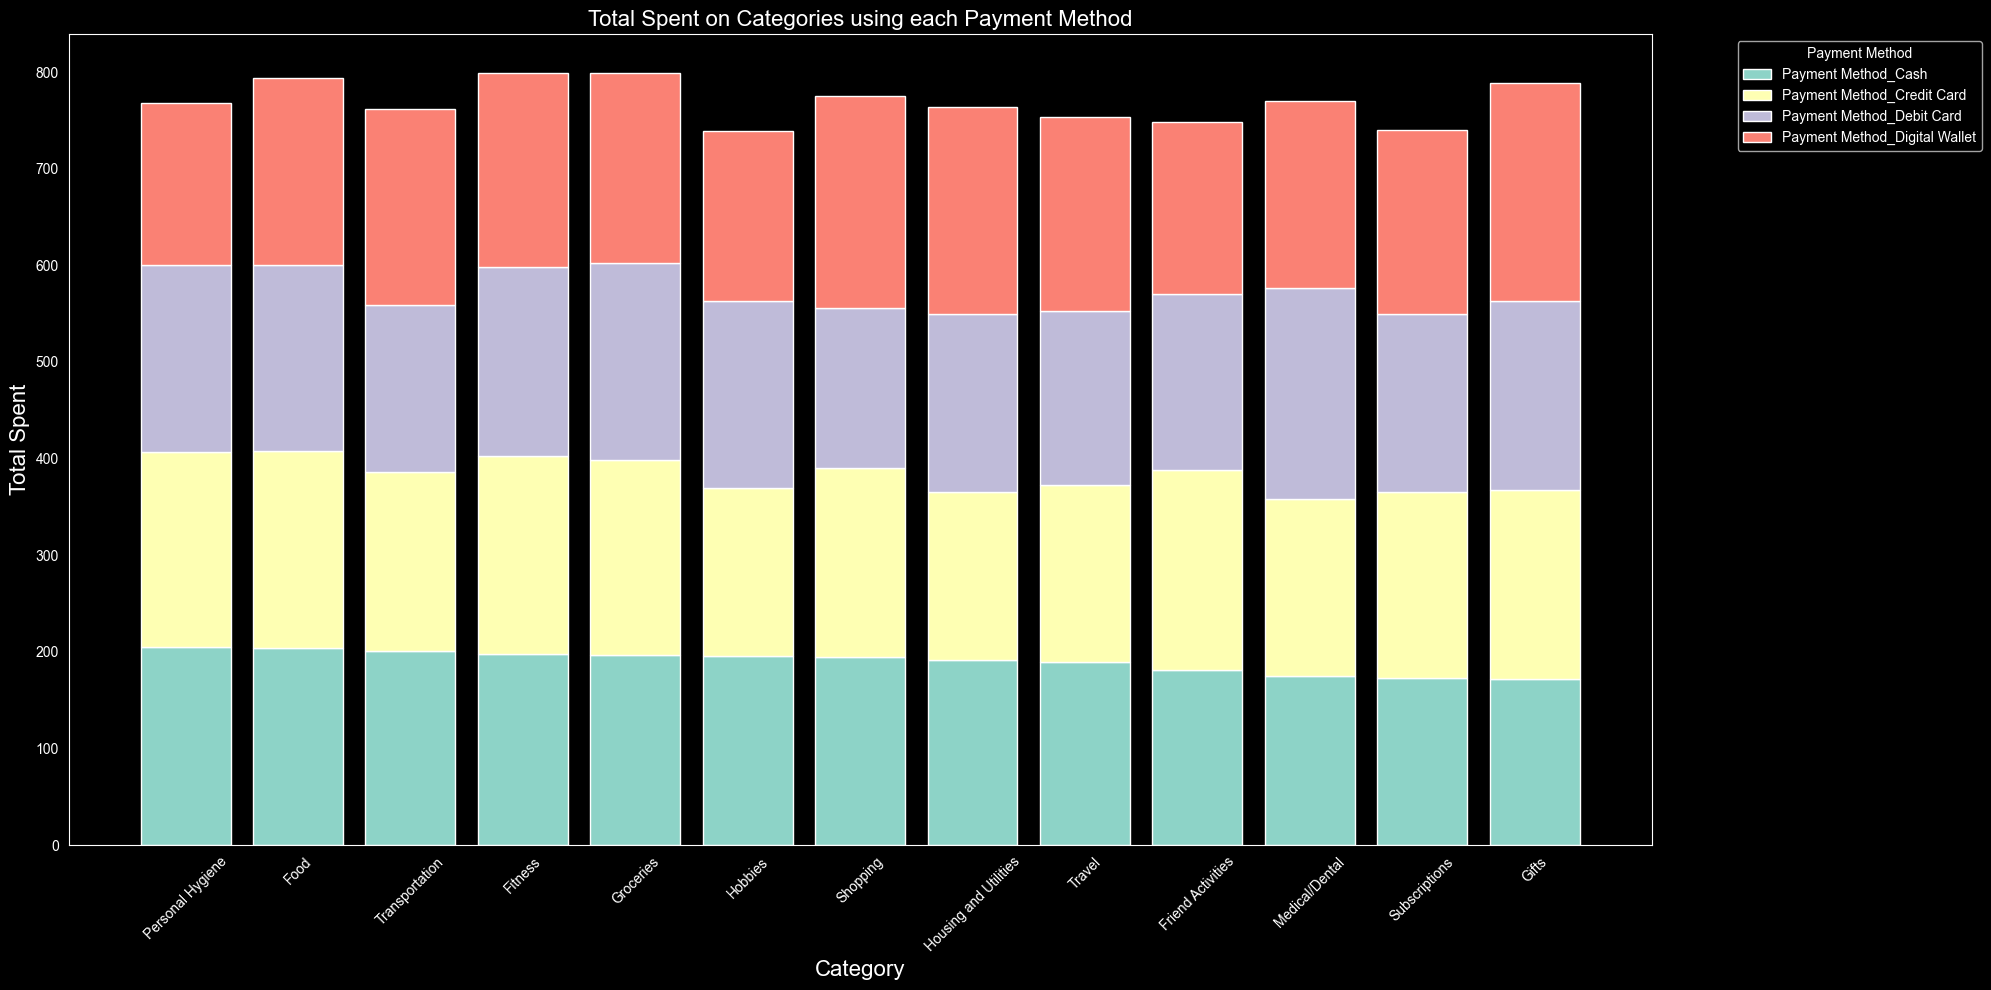

In [21]:
g1 = data.groupby('Category').agg({'Payment Method_Cash':'sum', 'Payment Method_Credit Card':'sum','Payment Method_Debit Card':'sum', 'Payment Method_Digital Wallet':'sum',
       }).sort_values(by='Payment Method_Cash',ascending=False)

stackbar(g1)
# Add labels, title, and legend
plt.title('Total Spent on Categories using each Payment Method', fontsize=16)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

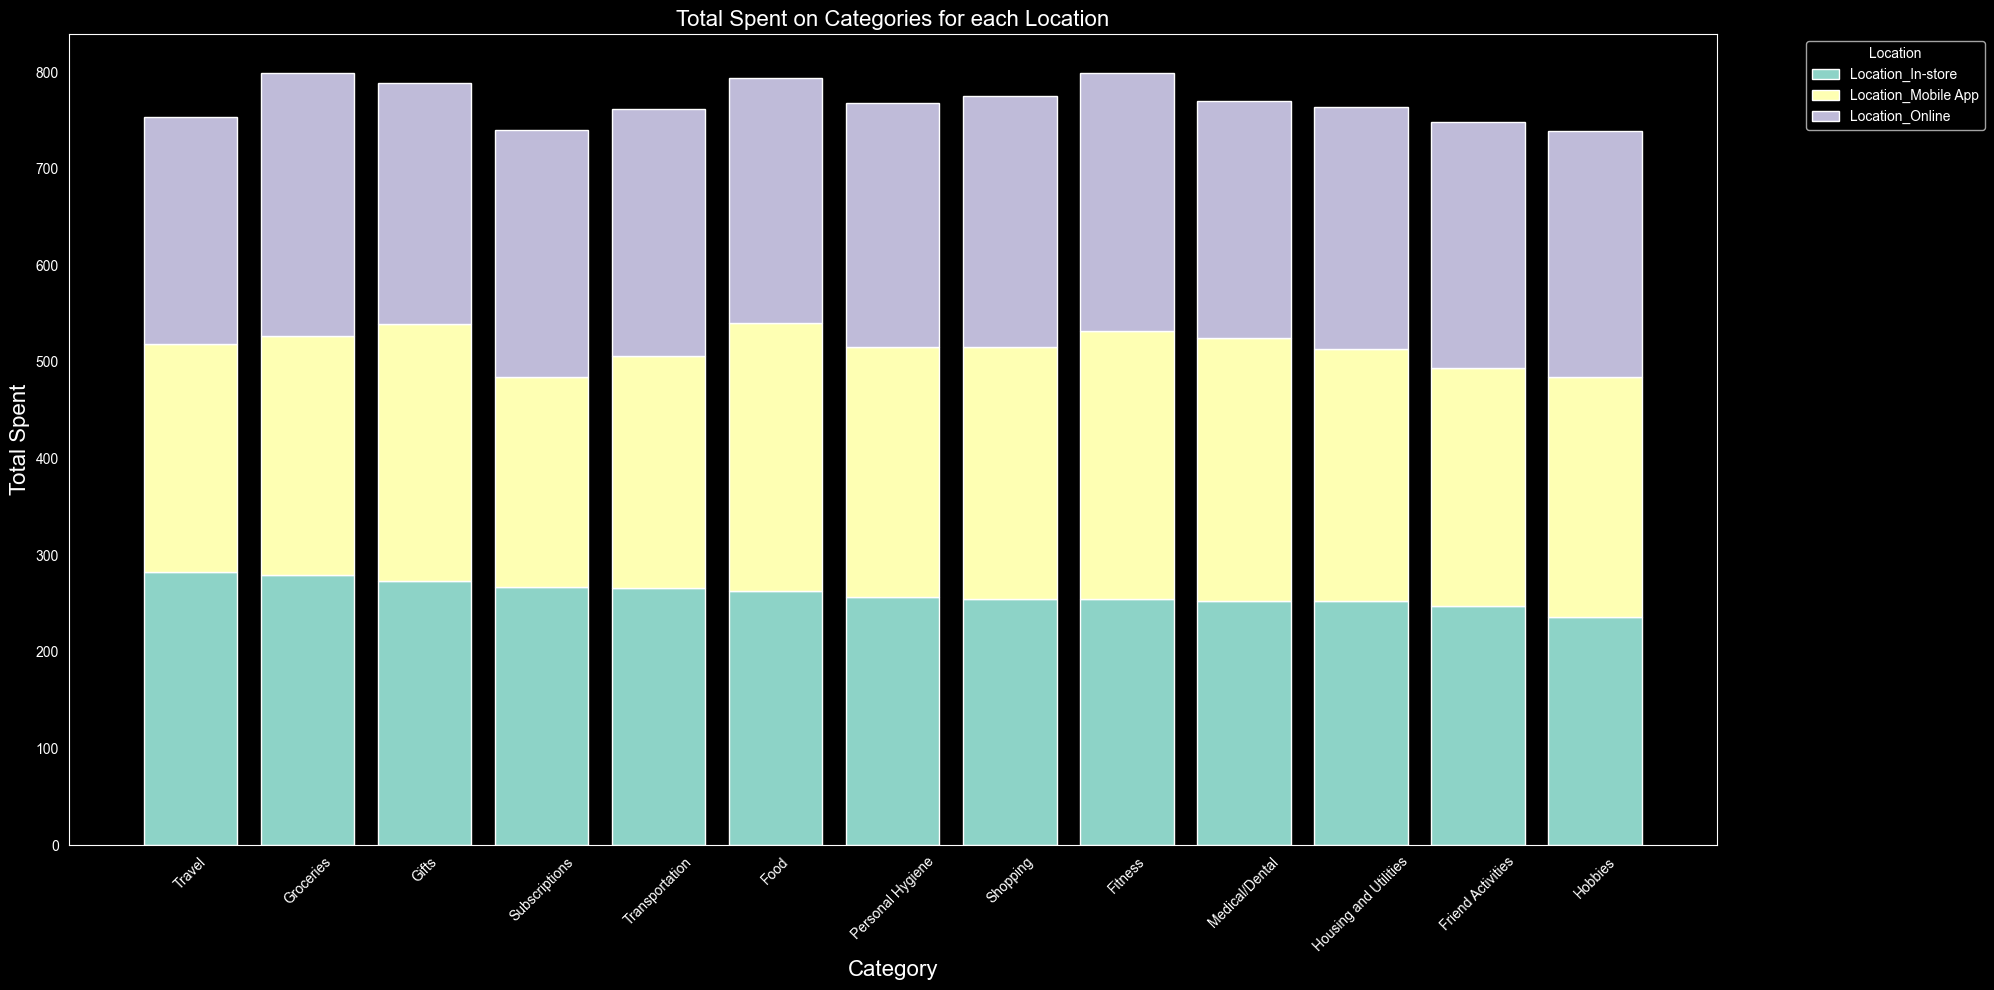

In [22]:
g2 = data.groupby('Category').agg({'Location_In-store':'sum', 'Location_Mobile App':'sum','Location_Online':'sum'
       }).sort_values(by='Location_In-store',ascending=False)

stackbar(g2)
# Add labels, title, and legend
plt.title('Total Spent on Categories for each Location', fontsize=16)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Location',bbox_to_anchor=(1.05, 1),  loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

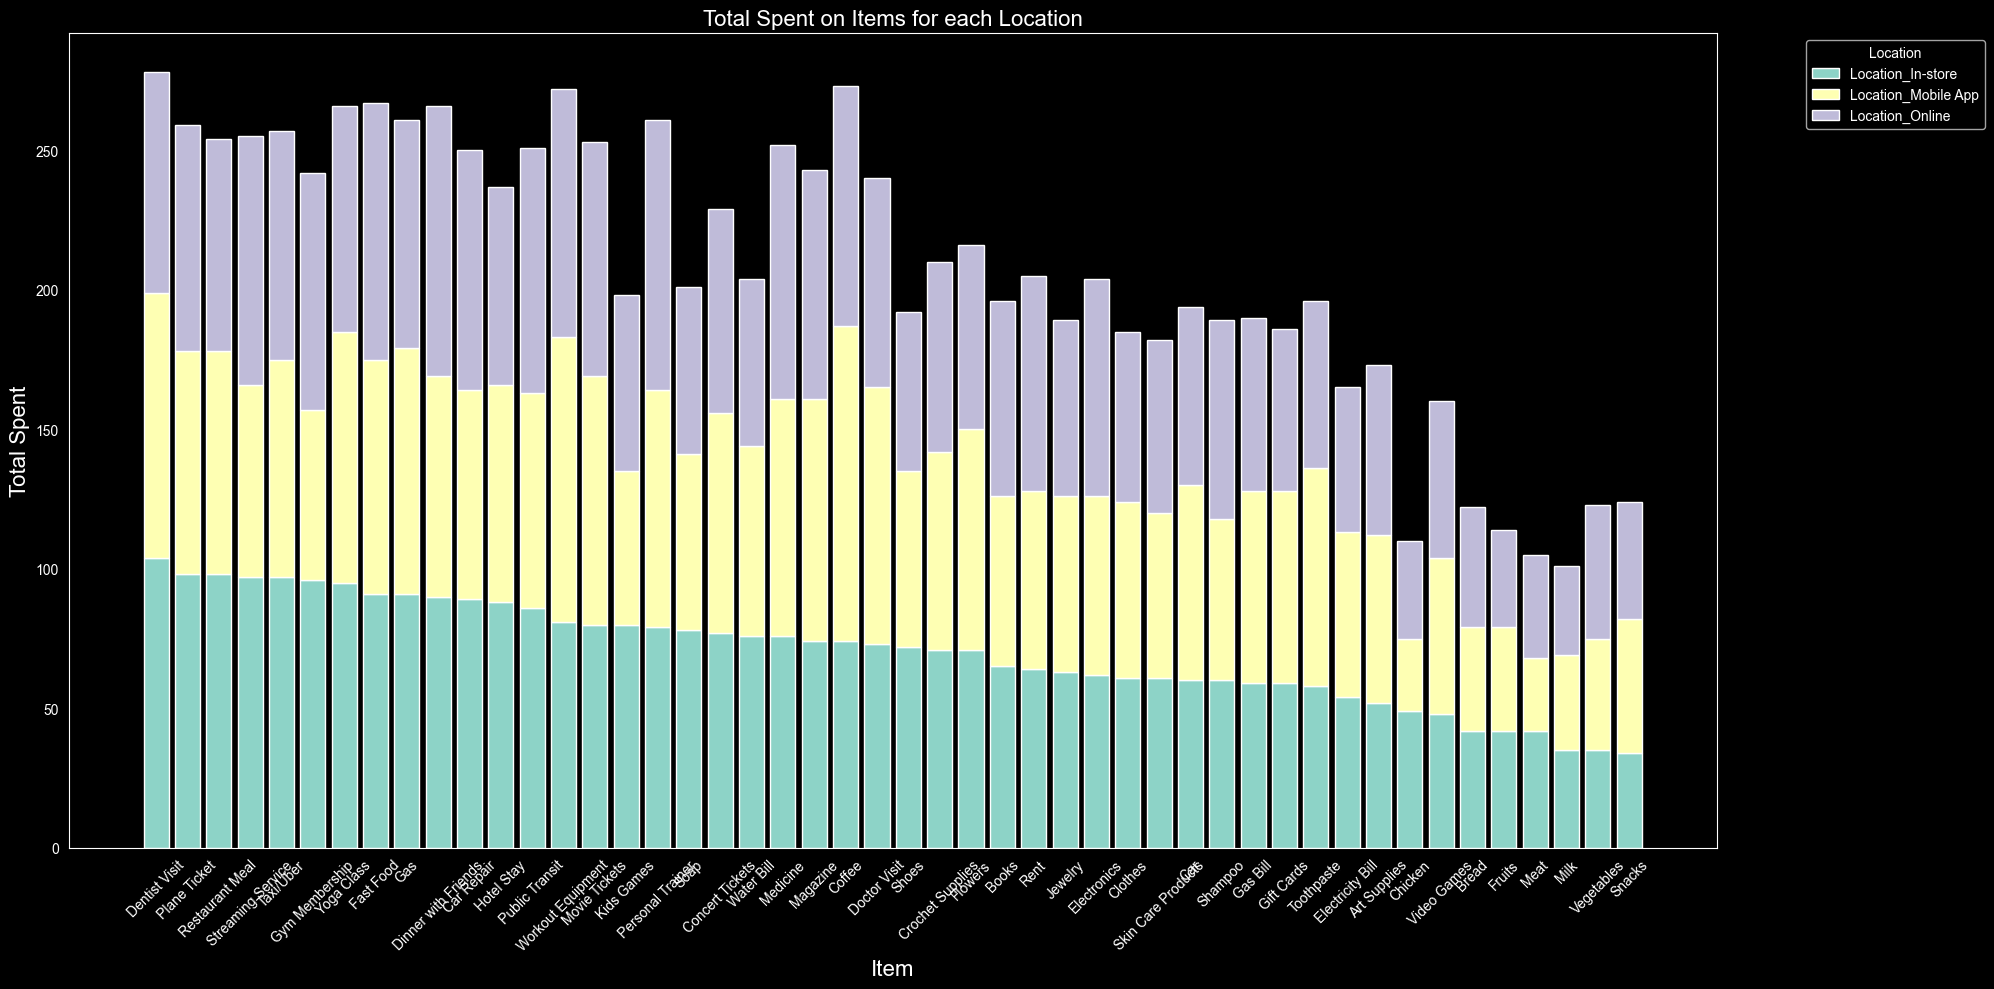

In [23]:
g3 = data.groupby('Item').agg({'Location_In-store':'sum', 'Location_Mobile App':'sum','Location_Online':'sum'
       }).sort_values(by='Location_In-store',ascending=False)

stackbar(g3)
# Add labels, title, and legend
plt.title('Total Spent on Items for each Location', fontsize=16)
plt.xlabel('Item', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

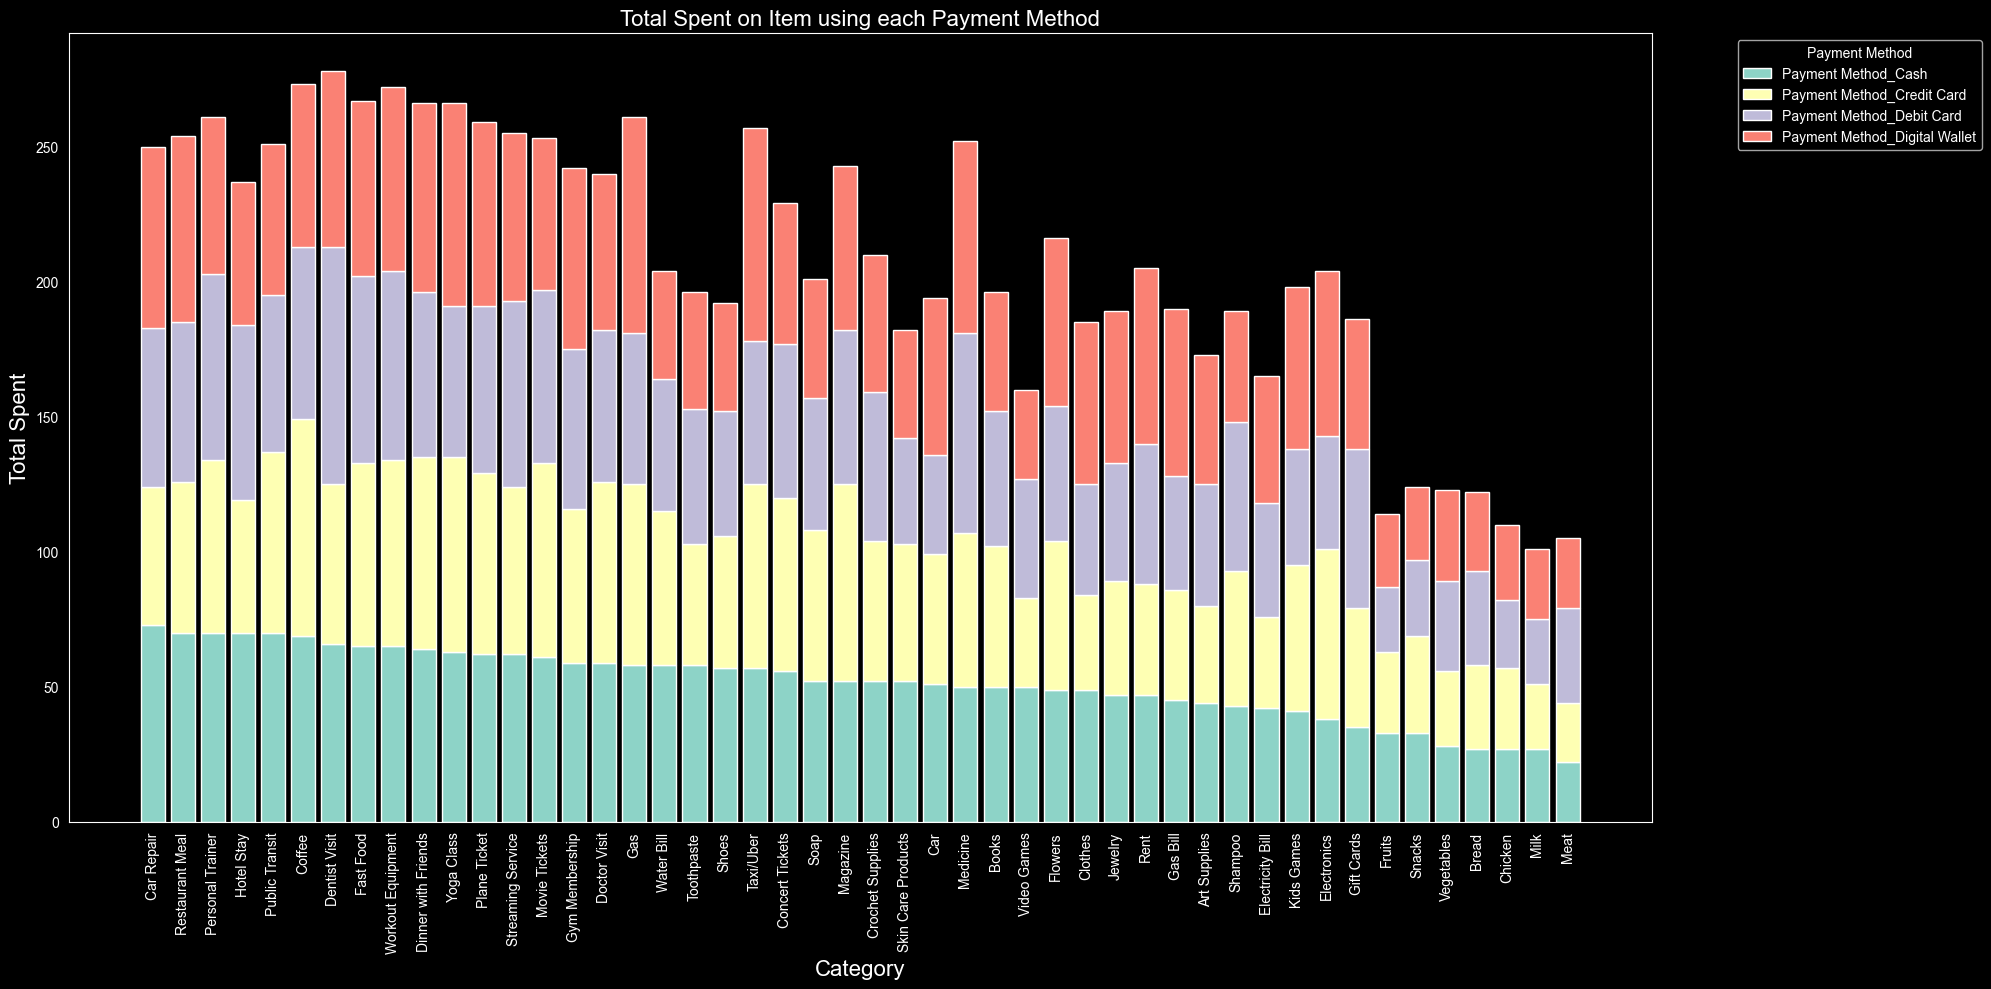

In [24]:
g4 = data.groupby('Item').agg({'Payment Method_Cash':'sum', 'Payment Method_Credit Card':'sum','Payment Method_Debit Card':'sum', 'Payment Method_Digital Wallet':'sum',
       }).sort_values(by='Payment Method_Cash',ascending=False)

stackbar(g4)
# Add labels, title, and legend
plt.title('Total Spent on Item using each Payment Method', fontsize=16)
plt.xlabel('Category', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

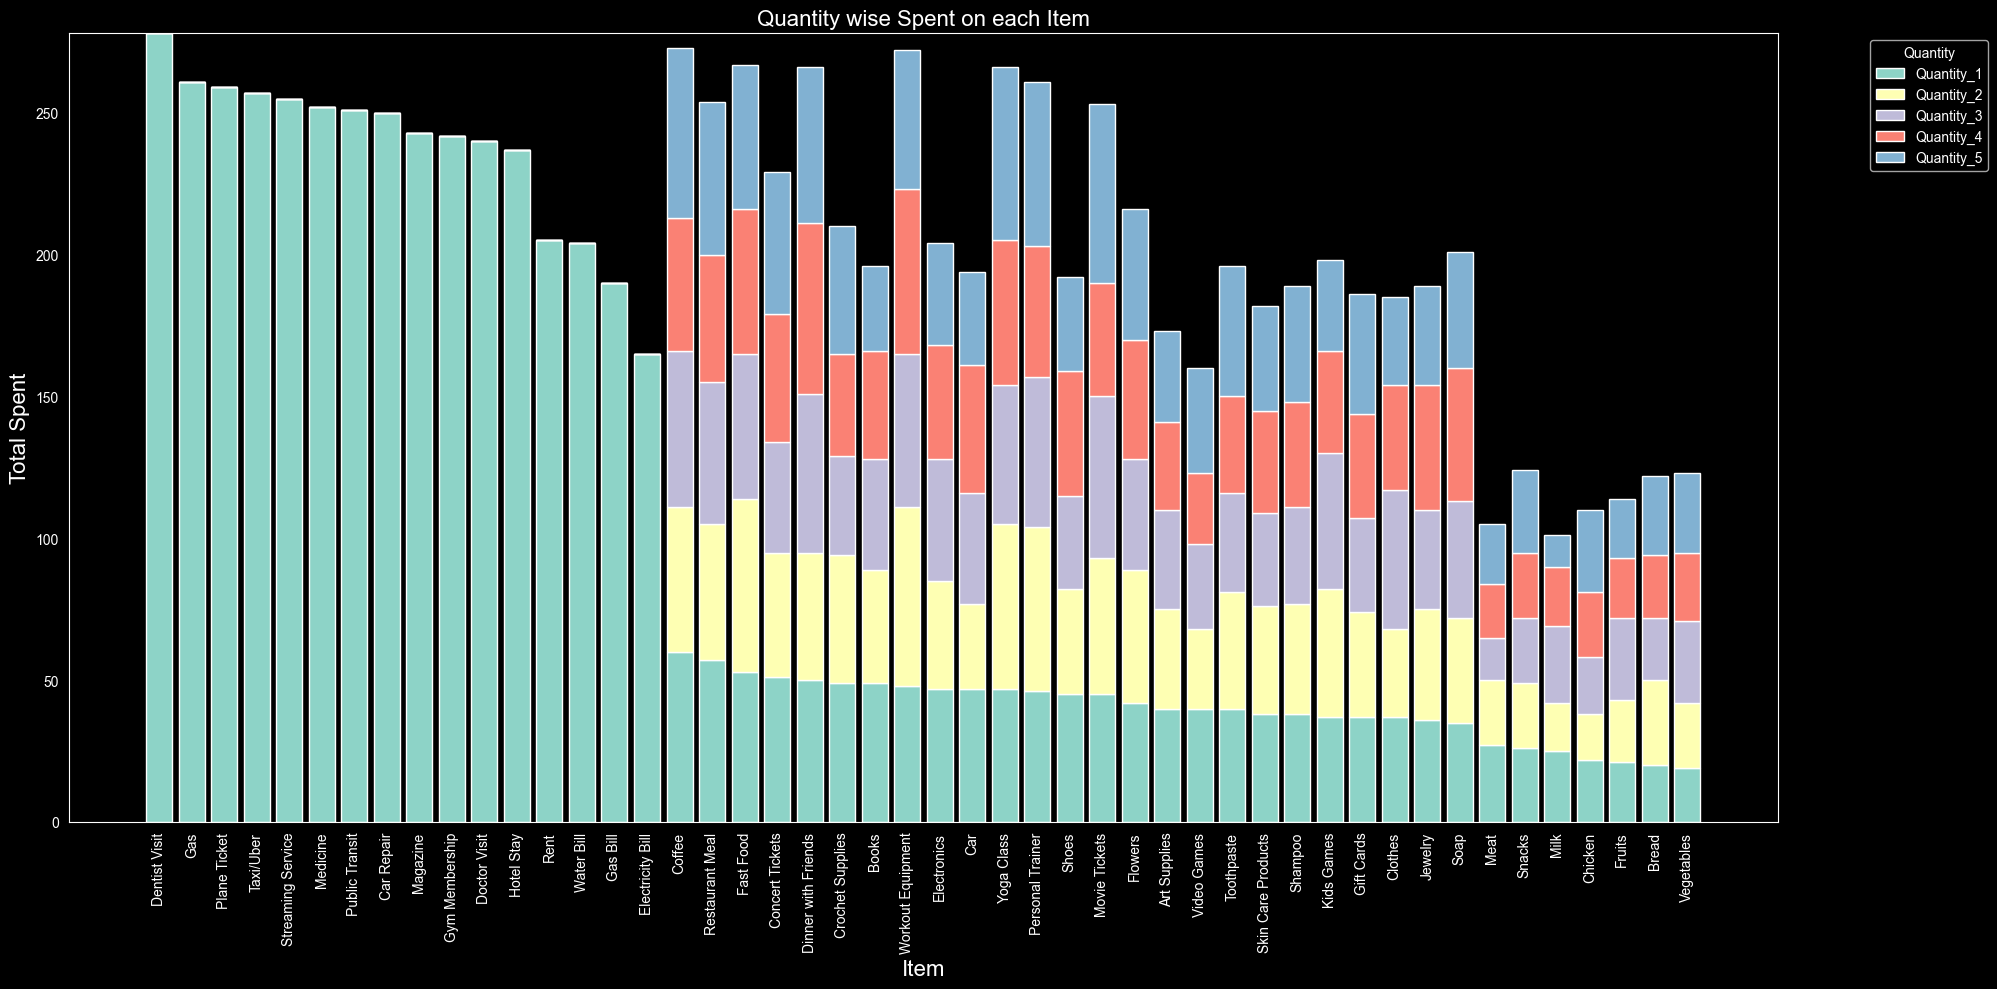

In [25]:
g5 = data.groupby('Item').agg({'Quantity_1':'sum', 'Quantity_2':'sum','Quantity_3':'sum', 'Quantity_4':'sum','Quantity_5':'sum'
       }).sort_values(by='Quantity_1',ascending=False)

stackbar(g5)
# Add labels, title, and legend
plt.title('Quantity wise Spent on each Item', fontsize=16)
plt.xlabel('Item', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Quantity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

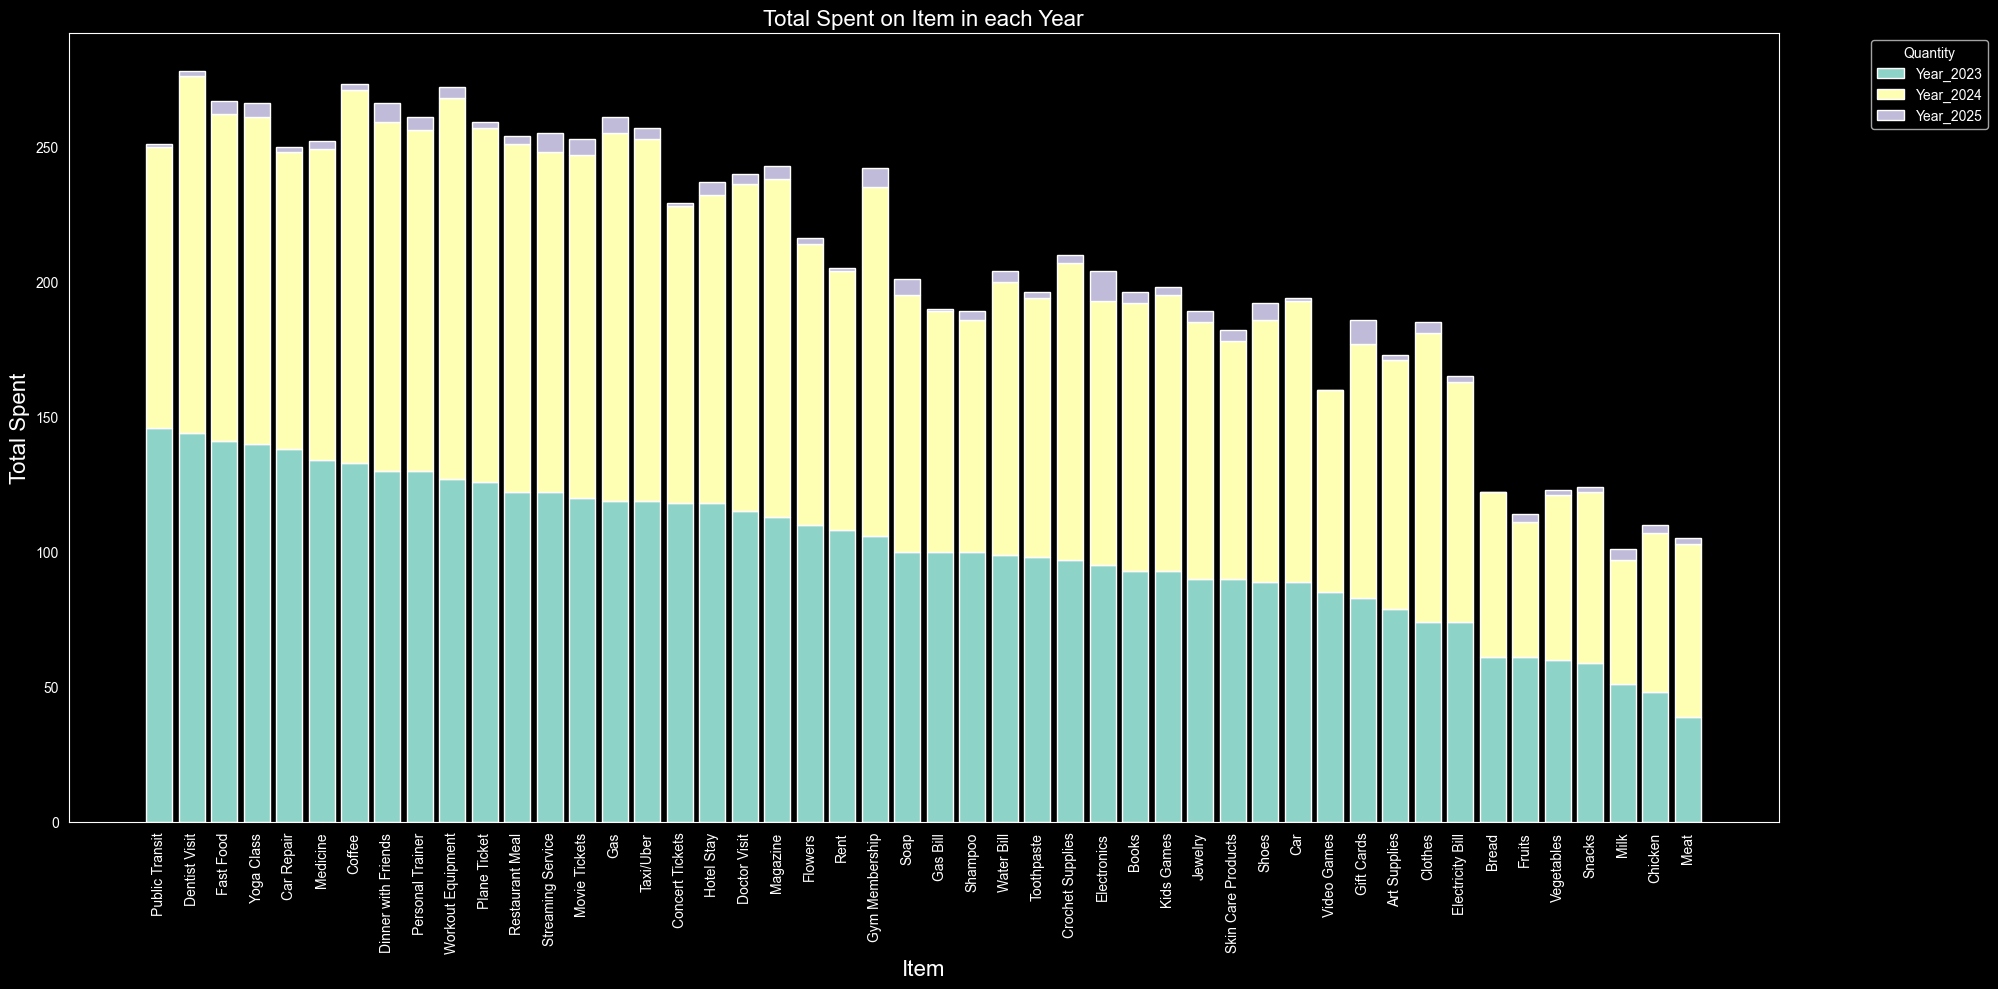

In [26]:
g6 = data.groupby('Item').agg({'Year_2023':'sum', 'Year_2024':'sum','Year_2025':'sum'
       }).sort_values(by='Year_2023',ascending=False)

stackbar(g6)
# Add labels, title, and legend
plt.title('Total Spent on Item in each Year', fontsize=16)
plt.xlabel('Item', fontsize=16)
plt.ylabel('Total Spent', fontsize=16)
plt.legend(title='Quantity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [27]:
data = data.drop(['Customer ID','Transaction Date'],axis=1)

data = dummies(data,['Category', 'Item','Month','Days'])

In [28]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled_data = pd.DataFrame(SS.fit_transform(data.values),index=data.index,columns=data.columns)
scaled_data.head()

,Price Per Unit,Total Spent,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Digital Wallet,Location_In-store,Location_Mobile App,Location_Online,Quantity_1,...,Month_October,Month_November,Month_December,Days_Monday,Days_Tuesday,Days_Wednesday,Days_Thursday,Days_Friday,Days_Saturday,Days_Sunday
0,-0.158693,-0.128761,-0.573963,-0.577196,1.749311,-0.586588,-0.715663,1.422956,-0.702921,0.987478,...,-0.293077,3.304384,-0.308497,-0.415296,-0.405147,2.491948,-0.401628,-0.411980,-0.407486,-0.414799
1,-0.146667,-0.121233,-0.573963,-0.577196,1.749311,-0.586588,1.397306,-0.702762,-0.702921,-1.012680,...,-0.293077,-0.302628,-0.308497,-0.415296,-0.405147,-0.401292,2.489864,-0.411980,-0.407486,-0.414799
2,-0.146442,-0.124960,-0.573963,-0.577196,-0.571654,1.704773,-0.715663,1.422956,-0.702921,0.987478,...,-0.293077,-0.302628,3.241524,-0.415296,-0.405147,-0.401292,-0.401628,-0.411980,2.454073,-0.414799
3,-0.157061,-0.125971,1.742272,-0.577196,-0.571654,-0.586588,1.397306,-0.702762,-0.702921,-1.012680,...,-0.293077,-0.302628,-0.308497,-0.415296,-0.405147,-0.401292,-0.401628,-0.411980,-0.407486,2.410807
4,-0.151742,-0.122162,-0.573963,-0.577196,1.749311,-0.586588,1.397306,-0.702762,-0.702921,-1.012680,...,-0.293077,-0.302628,-0.308497,-0.415296,-0.405147,-0.401292,-0.401628,2.427303,-0.407486,-0.414799


In [29]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer #pip install yellowbrick

#Use PCA to reduce dimensions in the dataset
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["PrincipalComponent_1", "PrincipalComponent_2","PrincipalComponent_3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PrincipalComponent_1,10000.0,-8.526513e-18,1.833557,-11.491743,-1.259911,-0.932494,1.987943,2.229872
PrincipalComponent_2,10000.0,8.633094e-17,1.743979,-1.564754,-1.282142,-0.507128,0.949039,16.177120
PrincipalComponent_3,10000.0,2.131628e-16,1.461993,-3.216281,-1.014613,-0.055923,0.927932,3.664073


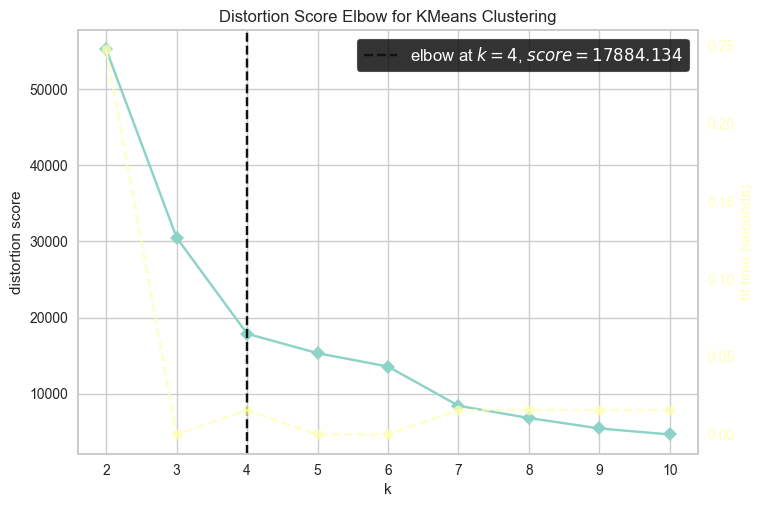

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)
visualizer.fit(PCA_ds) # Fit the data to the visualizer
plt.style.use("dark_background")
visualizer.show() 

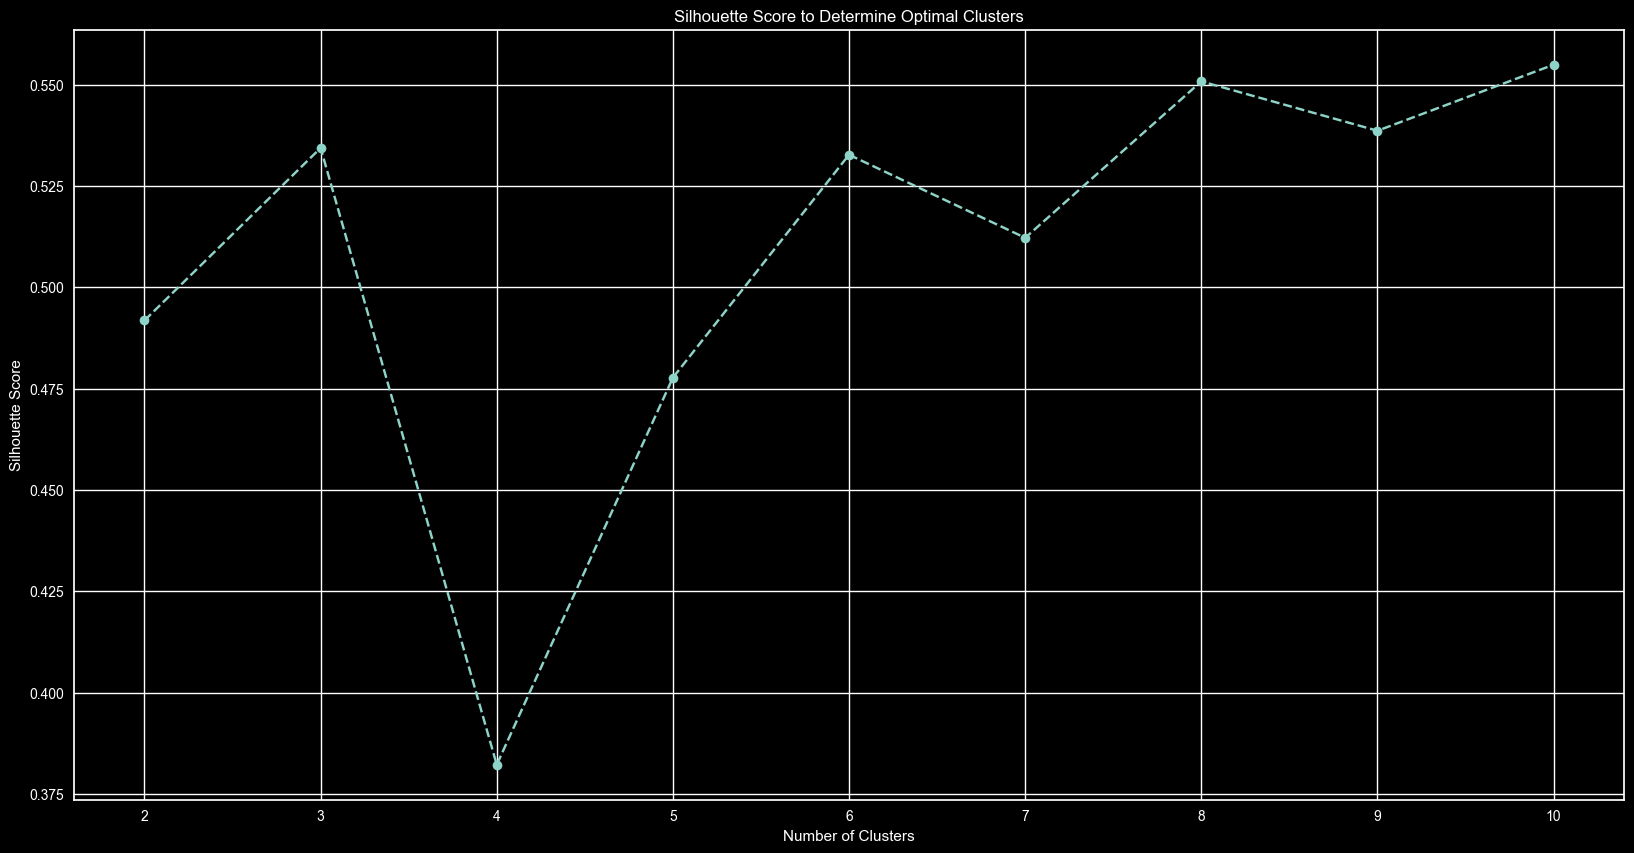

In [31]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Run K-Means for cluster numbers from 2 to 10 and calculate silhouette score
for i in range(2, 11):  # Silhouette score cannot be calculated for 1 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(PCA_ds)  
    score = silhouette_score(PCA_ds, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores to find the optimal cluster number
plt.figure(figsize=(20, 10))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score to Determine Optimal Clusters')
plt.style.use("dark_background")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

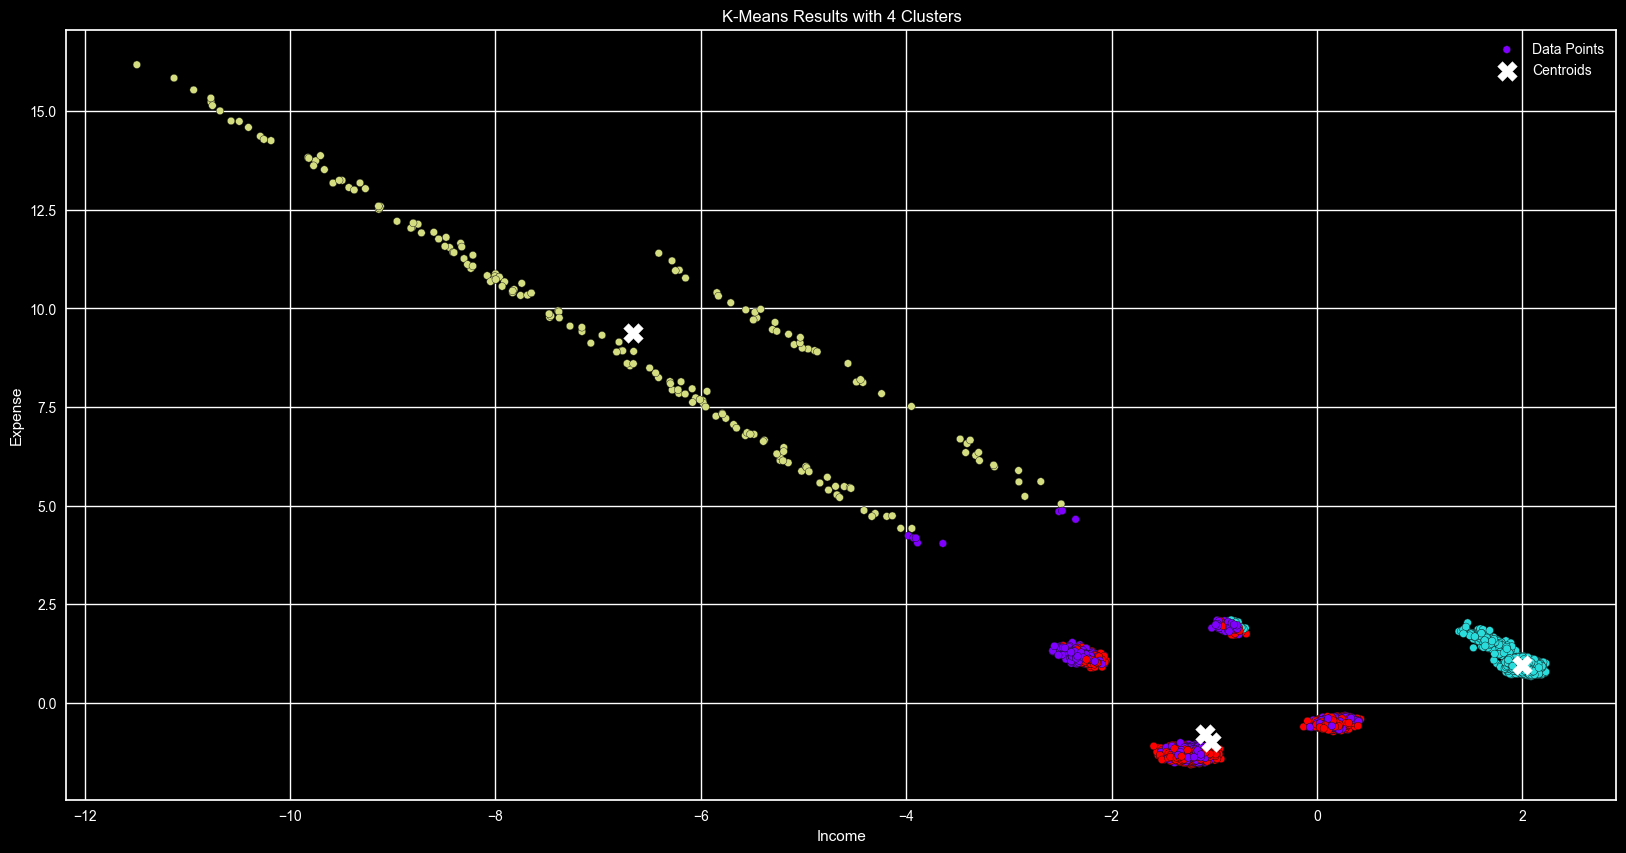

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(PCA_ds)

#Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_
plt.figure(figsize=(20, 10))
plt.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], c=labels, cmap='rainbow', s=30, label='Data Points',edgecolor='k')
plt.style.use("dark_background")
# Plot cluster centroids
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1], c='white', s=200, marker='X', label='Centroids')
plt.style.use("dark_background")
plt.title("K-Means Results with 4 Clusters")
plt.xlabel('Income')
plt.ylabel('Expense')
plt.grid(True)
plt.legend()
plt.show()

Silhouette Score with 4 clusters: 0.38220829461953654


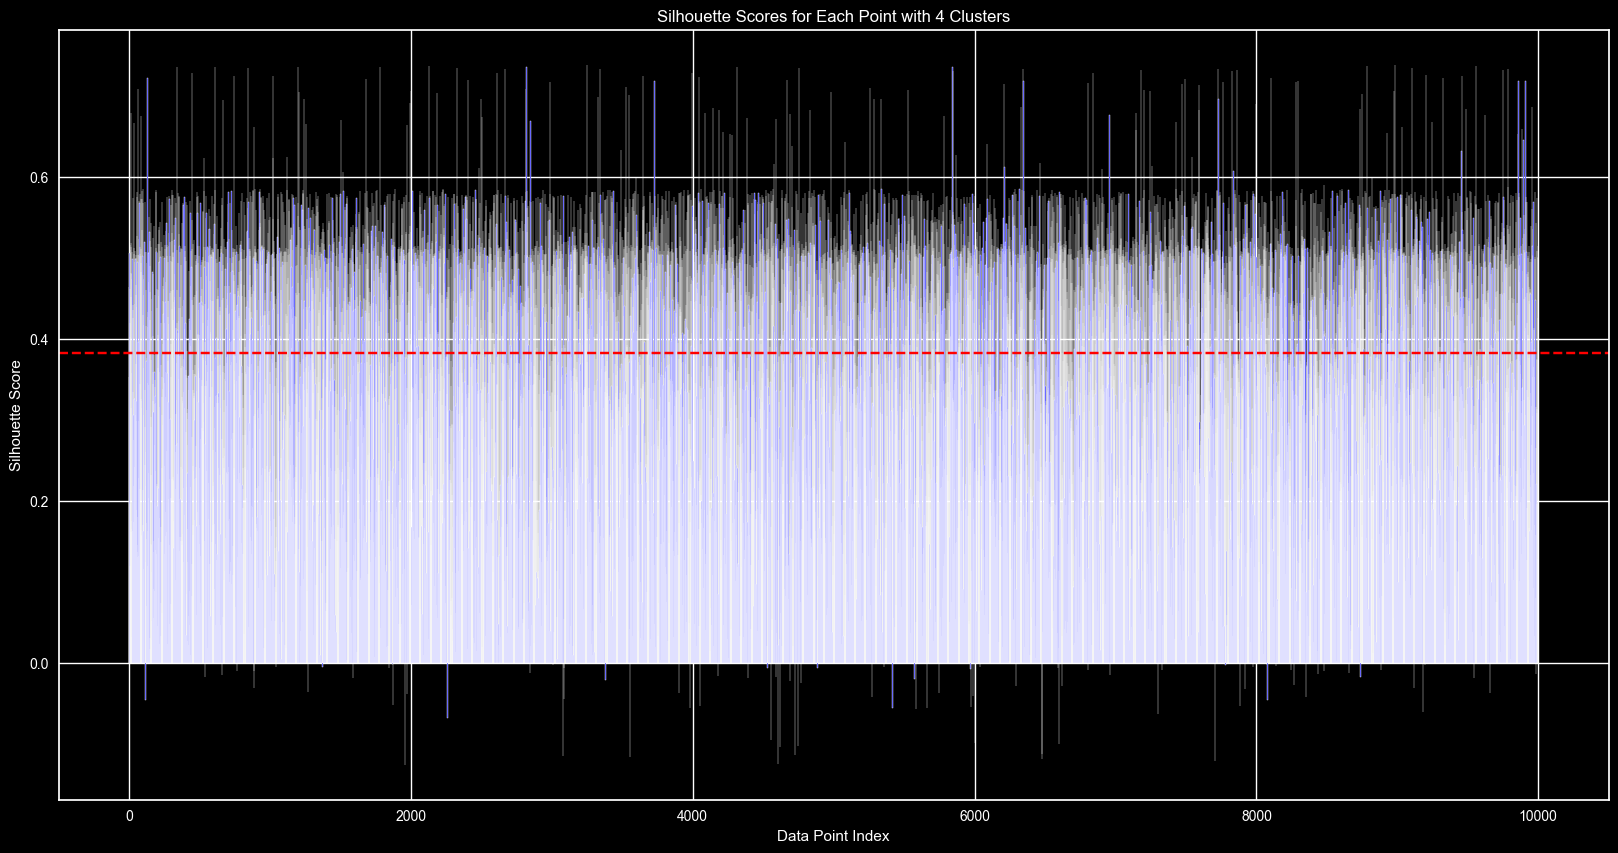

In [33]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(PCA_ds, kmeans.labels_)
print(f"Silhouette Score with 4 clusters: {sil_score}")

# Plot silhouette scores
from sklearn.metrics import silhouette_samples
sample_silhouette_values = silhouette_samples(PCA_ds, kmeans.labels_)

plt.figure(figsize=(20, 10))
plt.bar(range(len(PCA_ds)), sample_silhouette_values, color='blue')
plt.axhline(y=sil_score, color='red', linestyle='--')
plt.title("Silhouette Scores for Each Point with 4 Clusters")
plt.style.use("dark_background")
plt.xlabel("Data Point Index")
plt.ylabel("Silhouette Score")
plt.show()